## Plot lat-lon wind

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

In [2]:
datadir = '../../outputdata/regridded/'
dr_u = xr.open_dataarray(datadir+'C384L160_u700.nc', decode_times=False)
dr_v = xr.open_dataarray(datadir+'C384L160_v700.nc', decode_times=False)

In [3]:
dr_v

<xarray.DataArray 'v700' (time: 8, y: 180, x: 360)>
[518400 values with dtype=float64]
Coordinates:
    lon      (y, x) float64 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
    lat      (y, x) float64 -89.5 -89.5 -89.5 -89.5 -89.5 -89.5 -89.5 -89.5 ...
  * time     (time) float64 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0
Dimensions without coordinates: y, x

In [4]:
dr_u.load();dr_v.load();

In [5]:
lon, lat = [dr_u['lon'].values,dr_u['lat'].values]

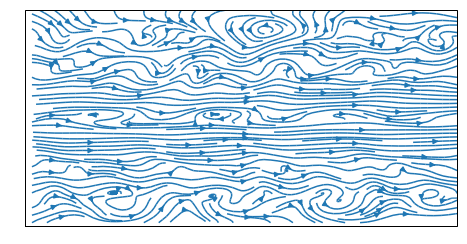

In [9]:
t=7

fig = plt.figure(figsize=[8,6])
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.coastlines()

ax.streamplot(lon,lat,
              dr_u.isel(time=t).values, dr_v.isel(time=t).values,
              density=2)